### **Import Needed Modules**

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Exploratory Data Analysis and Wrangling**

**Download dataset from this [here](https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions) and read the data description**

**Read data**

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

**Get sample**

In [3]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30541,26,management,single,tertiary,no,690,no,no,cellular,5,feb,76,3,-1,0,unknown,no
25868,40,blue-collar,married,secondary,no,4853,no,no,cellular,19,nov,259,1,111,2,failure,no
6911,28,services,single,secondary,no,3331,yes,no,unknown,28,may,229,2,-1,0,unknown,no
27252,40,management,married,secondary,no,752,no,yes,cellular,21,nov,456,1,157,1,failure,no
33921,44,blue-collar,married,unknown,no,1529,yes,no,cellular,30,apr,347,1,-1,0,unknown,yes
3772,36,management,divorced,tertiary,no,1343,yes,yes,unknown,16,may,73,1,-1,0,unknown,no
25013,33,blue-collar,married,secondary,no,157,yes,no,cellular,18,nov,110,1,182,1,failure,no
18041,46,technician,divorced,secondary,no,2862,yes,yes,cellular,30,jul,132,3,-1,0,unknown,no
18429,43,blue-collar,married,primary,no,2105,yes,no,cellular,31,jul,36,2,-1,0,unknown,no
33359,44,blue-collar,married,secondary,no,3060,yes,no,cellular,20,apr,87,2,151,3,failure,no


In [3]:
# Train data sample


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37903,34,blue-collar,married,secondary,no,2447,yes,no,cellular,14,may,330,2,-1,0,unknown,no
27646,57,self-employed,single,primary,no,6056,yes,no,cellular,21,nov,18,5,-1,0,unknown,no
12450,35,technician,married,secondary,no,251,yes,yes,unknown,1,jul,128,3,-1,0,unknown,no
21178,58,self-employed,married,tertiary,no,584,yes,no,cellular,14,aug,124,3,-1,0,unknown,no
11100,55,retired,married,secondary,no,31,no,no,unknown,18,jun,72,1,-1,0,unknown,no
27225,44,blue-collar,married,unknown,no,1149,yes,no,cellular,21,nov,67,5,-1,0,unknown,no
42034,57,housemaid,married,tertiary,no,2326,no,no,cellular,28,oct,207,1,194,1,success,yes
24696,43,management,married,tertiary,no,2767,yes,no,cellular,17,nov,374,1,186,7,failure,no
4025,42,management,single,tertiary,no,10561,no,no,unknown,16,may,243,2,-1,0,unknown,no
36832,27,admin.,single,secondary,no,292,yes,no,cellular,12,may,53,9,362,8,other,no


In [4]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3101,44,blue-collar,married,primary,no,2657,yes,no,unknown,20,jun,202,2,-1,0,unknown,no
4250,32,management,single,tertiary,no,2,yes,no,cellular,11,sep,100,2,-1,0,unknown,yes
1507,40,management,married,tertiary,no,-7,no,yes,telephone,25,jul,697,1,-1,0,unknown,no
1140,36,management,single,tertiary,no,3875,yes,no,unknown,27,may,21,5,-1,0,unknown,no
1453,30,admin.,married,secondary,no,518,yes,no,cellular,8,may,127,1,-1,0,unknown,no
296,29,management,married,tertiary,no,451,no,no,cellular,28,jan,451,1,-1,0,unknown,no
2210,34,entrepreneur,married,tertiary,no,4343,no,no,unknown,9,jun,85,4,-1,0,unknown,no
4218,48,management,married,tertiary,no,5057,no,yes,cellular,19,nov,37,1,-1,0,unknown,no
4336,40,blue-collar,married,secondary,no,440,yes,no,unknown,5,jun,327,2,-1,0,unknown,no
93,32,management,single,tertiary,no,3616,no,no,cellular,14,aug,165,2,-1,0,unknown,no


In [4]:
# Test data sample


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1124,37,technician,married,unknown,no,189,no,no,cellular,1,oct,238,1,107,2,success,yes
1189,34,technician,single,secondary,no,201,no,no,cellular,22,jul,257,2,-1,0,unknown,no
99,31,unemployed,single,primary,no,406,no,no,cellular,4,feb,736,1,-1,0,unknown,yes
3724,37,housemaid,divorced,secondary,no,1040,yes,no,cellular,13,may,199,1,173,2,failure,no
3253,39,blue-collar,married,unknown,no,157,yes,no,unknown,30,may,99,6,-1,0,unknown,no
1737,59,housemaid,married,secondary,no,345,no,no,unknown,9,jun,38,1,-1,0,unknown,no
4185,31,management,married,tertiary,no,271,no,no,cellular,18,nov,89,1,-1,0,unknown,no
3503,27,services,single,secondary,no,266,no,yes,cellular,7,jul,232,1,-1,0,unknown,no
2683,33,housemaid,married,primary,no,212,yes,no,cellular,11,jul,260,2,-1,0,unknown,no
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,234,3,failure,no


**Get data informaion**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### **Age Feature - The age of the customer.**

In [6]:
train_df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [6]:
# Get statistical analysis for age column


count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

**Plot hisogram to show the frequency distribution of a ages**
    
    Note: use palette='viridis' in all of your graphs for better color representation.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1565121621.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_df.age, bins = 50, kde = True, palette='viridis')


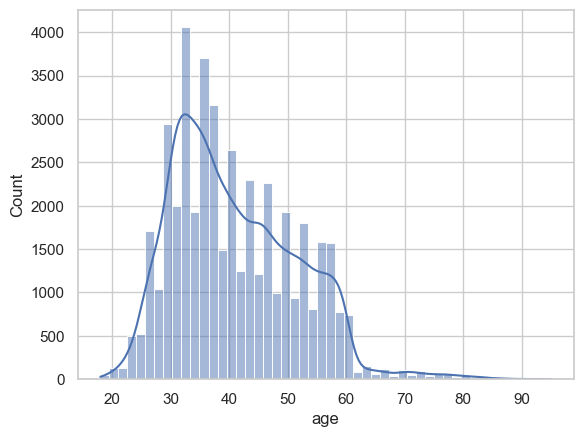

In [7]:
sns.histplot(train_df.age, bins = 50, kde = True, palette='viridis')
plt.show()

/tmp/ipykernel_42/2994252962.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(train_df['age'], bins=50, kde=True, palette='viridis')


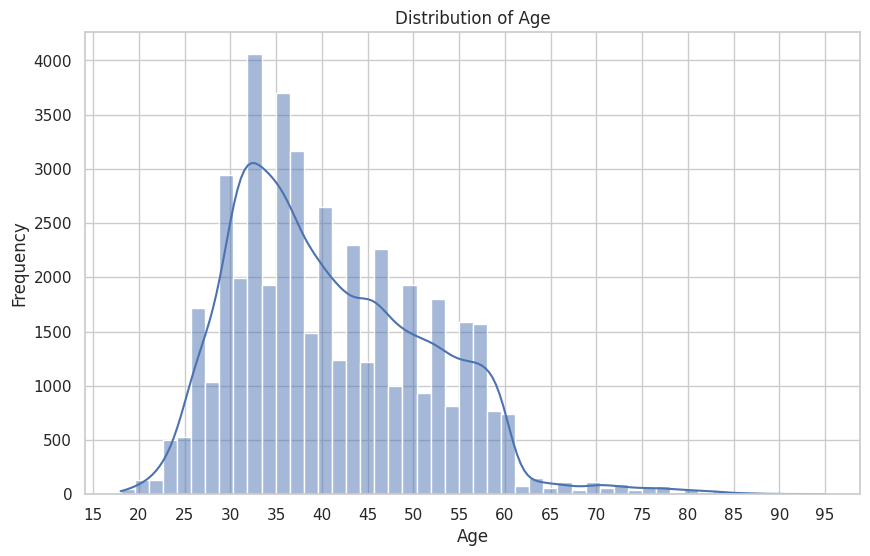

#### **Job Feature - The occupation/employment status of the customer.**

**Show the distribution of job column**

In [8]:
train_df.job.value_counts(ascending=False)

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

**Rename "unknown" values with "others"**

In [9]:
train_df.job.replace('unknown', 'others', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3553263969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.job.replace('unknown', 'others', inplace=True)


In [10]:
train_df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: count, dtype: int64

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
others            288
Name: count, dtype: int64

**Plot the distribution**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3826721737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'job', palette= 'viridis', order=train_df.job.value_counts().index)


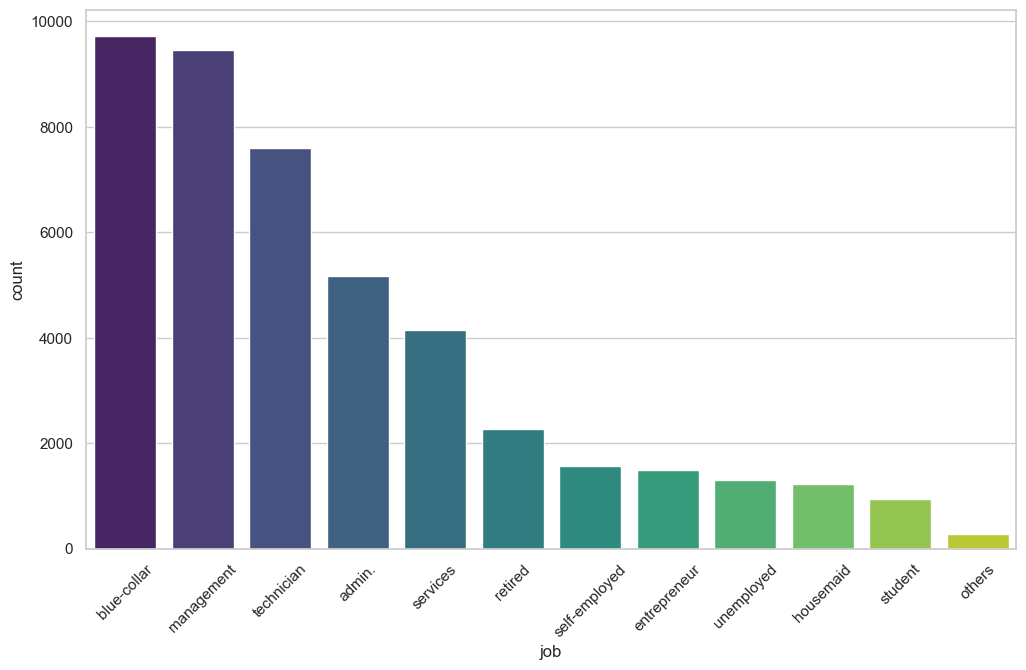

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'job', palette= 'viridis', order=train_df.job.value_counts().index)
plt.xticks(rotation = 45)
plt.show()

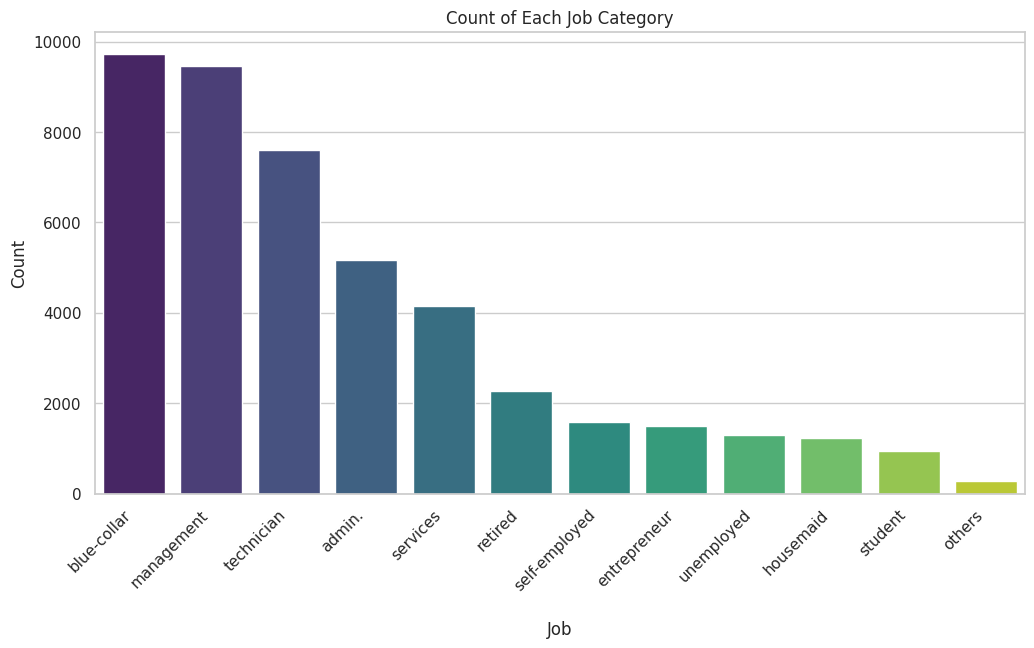

**Also, Don't forget to rename these values in test data.**

In [12]:
test_df.job.replace('unknown', 'others', inplace=True)
test_df.job.value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3012246205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.job.replace('unknown', 'others', inplace=True)


job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: count, dtype: int64

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
others            38
Name: count, dtype: int64

#### **Marital-Status Feature - The marital status of the customer.**

**Show the distribution of marital-status column**

In [13]:
train_df.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

**Plot the distribution**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\660322327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'marital', palette= 'viridis', order=train_df.marital.value_counts().index)


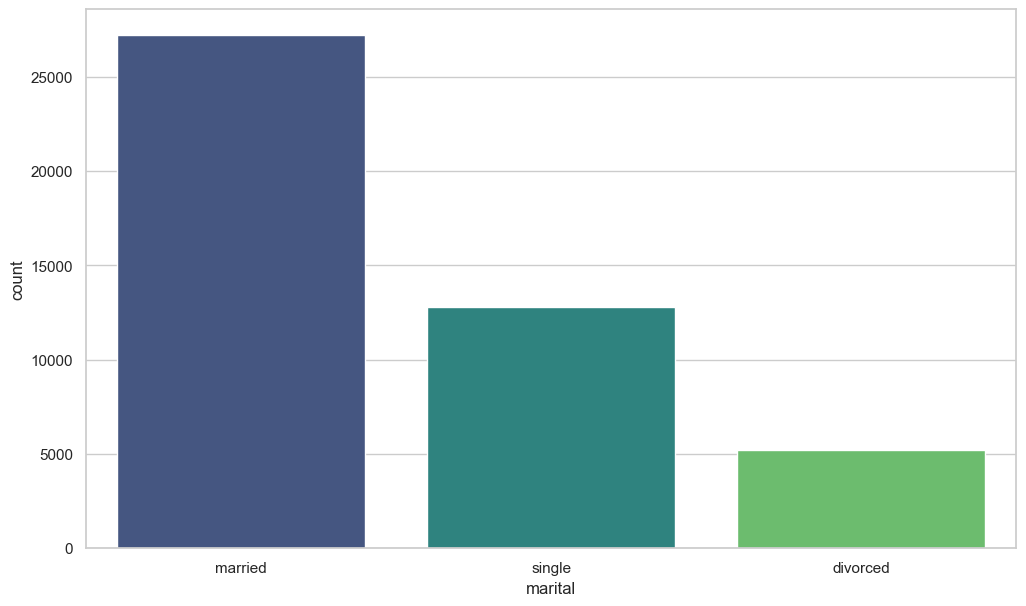

In [14]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'marital', palette= 'viridis', order=train_df.marital.value_counts().index)
plt.show()

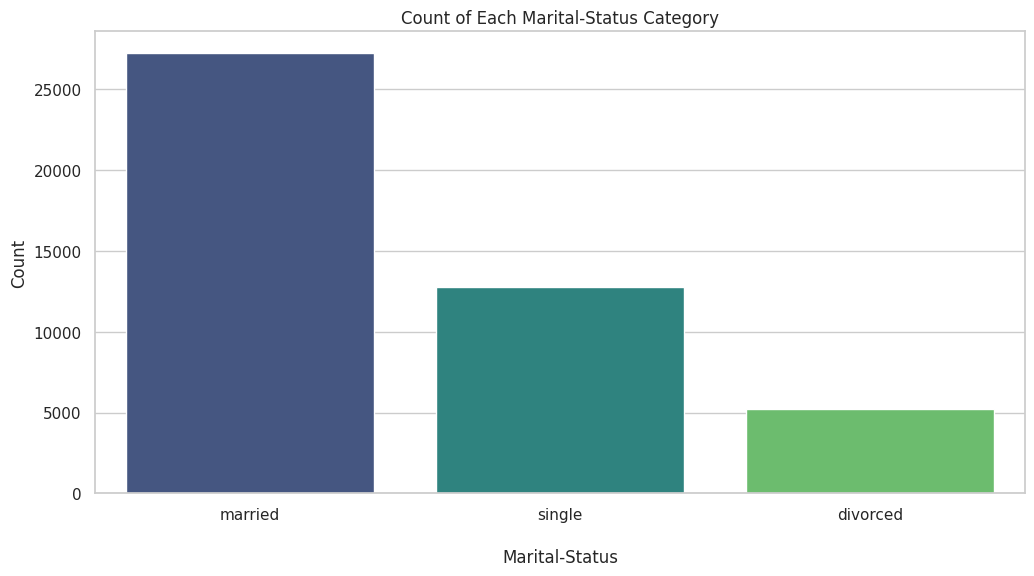

#### **Educational Feature - The education level attained by the customer.**

**Show the distribution of Education column**

In [15]:
train_df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

**Rename "unknown" values with "others"**

In [16]:
train_df.education.replace('unknown', 'others', inplace=True)
train_df.education.value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2133785481.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.education.replace('unknown', 'others', inplace=True)


education
secondary    23202
tertiary     13301
primary       6851
others        1857
Name: count, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
others        1857
Name: count, dtype: int64

**Show the distribution of education column**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3013348836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'education', palette= 'viridis', order=train_df.education.value_counts().index)


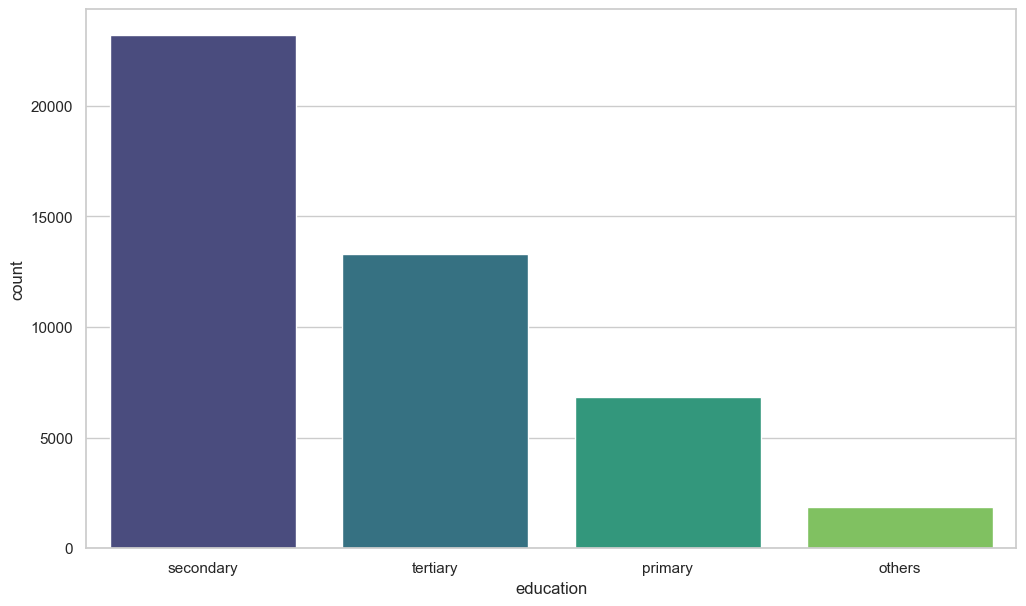

In [17]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'education', palette= 'viridis', order=train_df.education.value_counts().index)
plt.show()

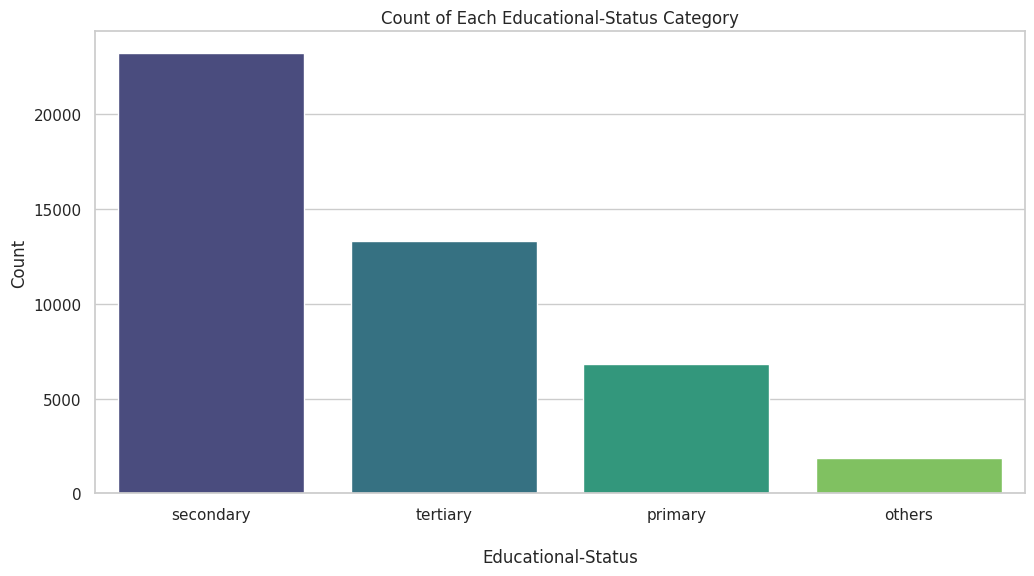

**Also, Don't forget to rename these values in test data.**

In [18]:
test_df.education.replace('unknown', 'others', inplace=True)
test_df.education.value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1741179100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.education.replace('unknown', 'others', inplace=True)


education
secondary    2306
tertiary     1350
primary       678
others        187
Name: count, dtype: int64

education
secondary    2306
tertiary     1350
primary       678
others        187
Name: count, dtype: int64

#### **Credit in Default Feature - Whether the customer has credit in default or not.**

In [19]:
train_df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

default
no     44396
yes      815
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\4102963690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'default', palette= 'viridis', order=train_df.default.value_counts().index)


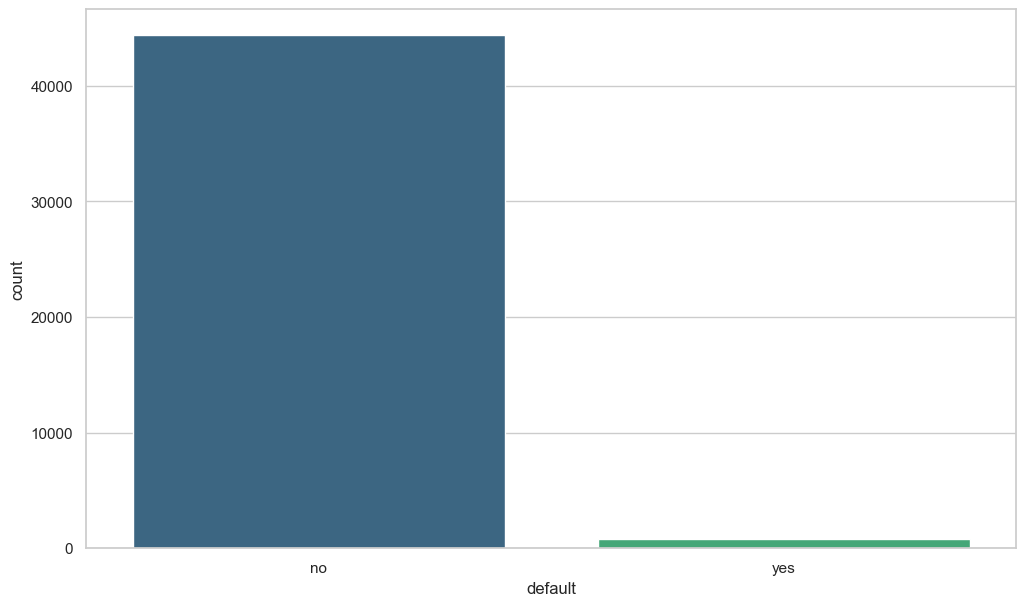

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'default', palette= 'viridis', order=train_df.default.value_counts().index)
plt.show()

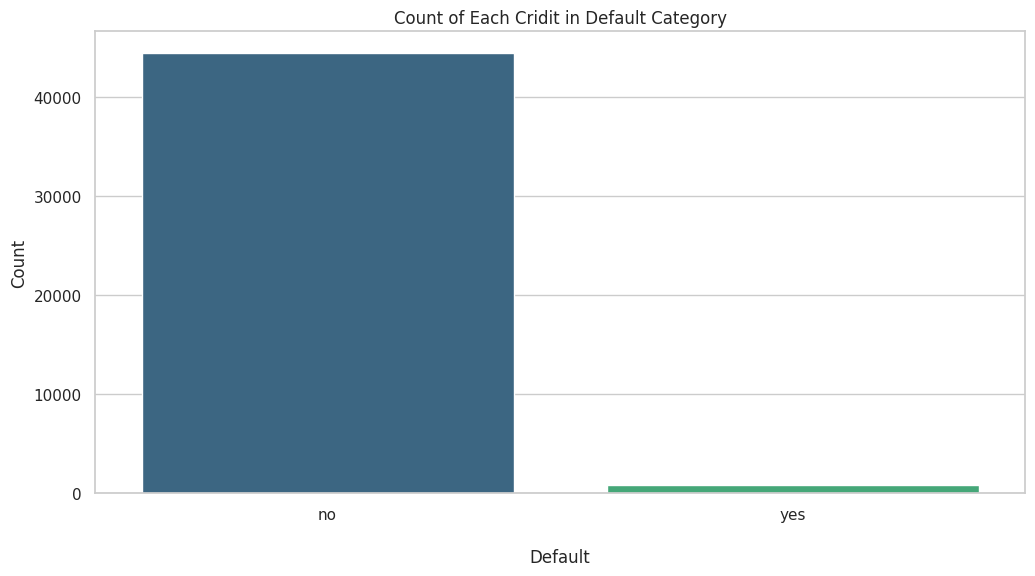

**This feature is worthless, the "yes" values is so poor, so I'll drop it.**

In [21]:
train_df.drop(columns=['default'], inplace = True)

In [20]:
# drop default column in train data


**Also, don't forget drop this column from test data.**

In [22]:
test_df.drop(columns=['default'], inplace = True)

In [21]:
# drop default column in test data


#### **Balance Feature - The balance in the customer's account.**

In [23]:
train_df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

**Plot the graph using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2799952157.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df.balance, palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

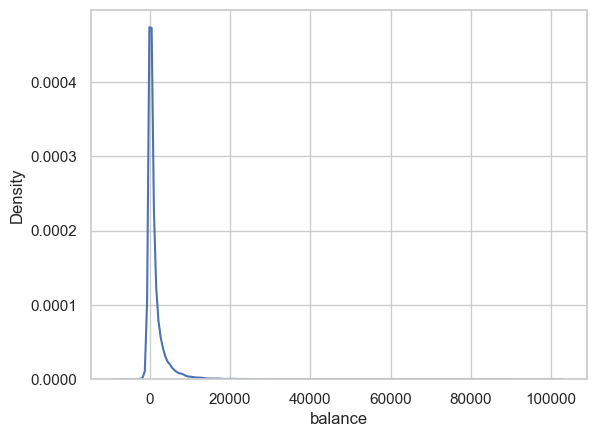

In [24]:
sns.kdeplot(train_df.balance, palette='viridis')

/tmp/ipykernel_42/1190658190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


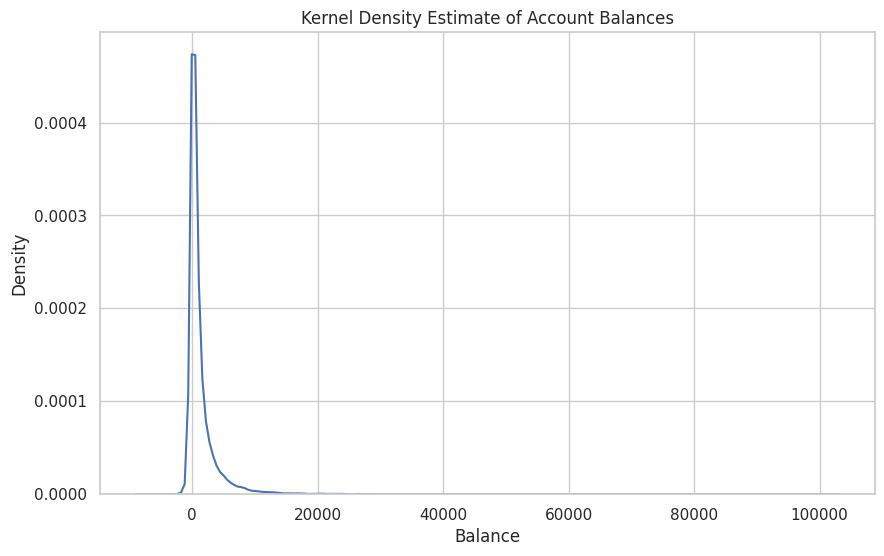

    What do you say about this graph?

- 

**Check for values under zero**

In [25]:
train_df[train_df.balance<=0].balance.count()

7280

7280

**Define the percentile threshold for outliers - 95%**
- **All the data that above 95% will be considered outliers**

In [26]:
percentile_threshold = 95

percentile_value = int(np.percentile(train_df.balance, percentile_threshold))

outliers = train_df[train_df.balance>percentile_value]

print(f'{percentile_threshold}th percentile value: {percentile_value}')
print(f'Number of Potential Outliers: {outliers.value_counts().sum()}')

95th percentile value: 5768
Number of Potential Outliers: 2260


95th Percentile Value: 5768
Number of Potential Outliers: 2260


- **The maximum value of 102127 is considerably higher than the 95th percentile (5768).**
- **Drop the values that above 5768.**

In [27]:
train_df.drop(train_df[train_df['balance'] > 5768].index, inplace=True)

**Plot the Balance graph again using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2799952157.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df.balance, palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

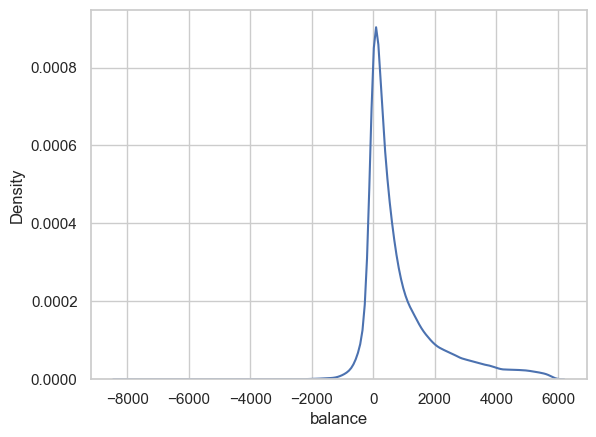

In [28]:
sns.kdeplot(train_df.balance, palette='viridis')

/tmp/ipykernel_42/1190658190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


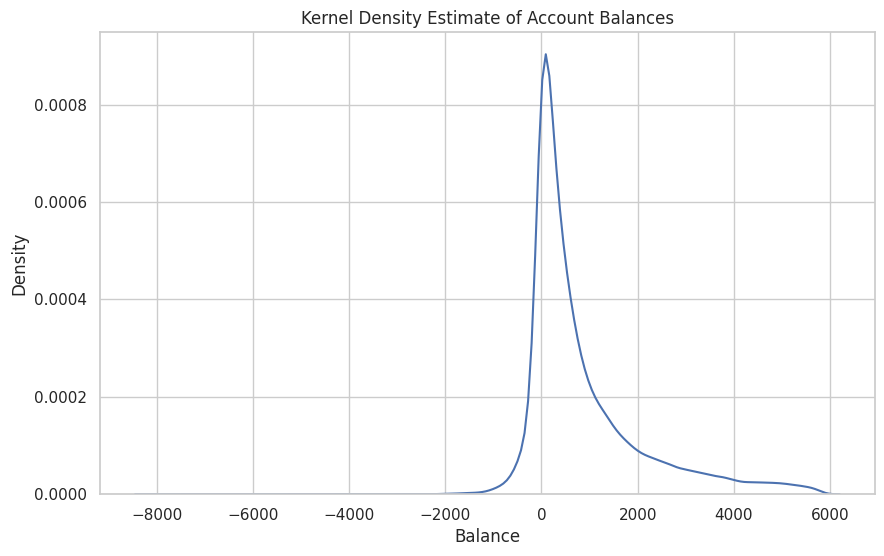

**We have solved the skew in right side**

**Plot the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of this column using seaborn**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2411299523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, y = 'balance', palette='viridis')


<Axes: ylabel='balance'>

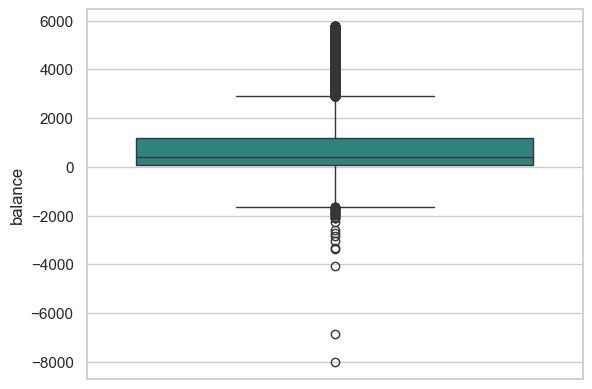

In [29]:
sns.boxplot(data=train_df, y = 'balance', palette='viridis')

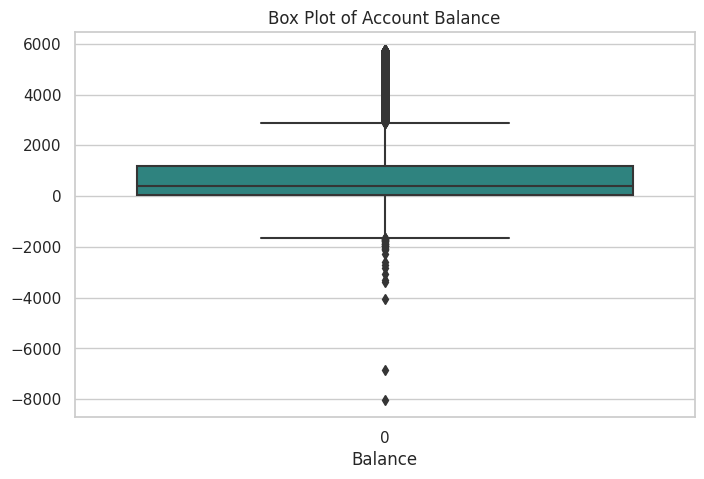

**Define the percentile threshold for outliers - 5%**
- **All the data that under 5% will be considered outliers**

In [30]:
percentile_threshold = 5

percentile_value = int(np.percentile(train_df.balance, percentile_threshold))

outliers = train_df[train_df.balance<percentile_value]

print(f'{percentile_threshold}th percentile value: {percentile_value}')
print(f'Number of Potential Outliers: {outliers.value_counts().sum()}')

5th percentile value: -191
Number of Potential Outliers: 2142


5th Percentile Value: -191
Number of Potential Outliers: 2142


- **The minimum value of -8019 is considerably lower than the 5th percentile (-191).**
- **Drop the values that under -191.**

In [31]:
train_df.drop(train_df[train_df['balance'] <= -191].index, inplace=True)

**Plot the Balance graph again using [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) from seaborn**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3772708786.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


<Axes: xlabel='balance', ylabel='Density'>

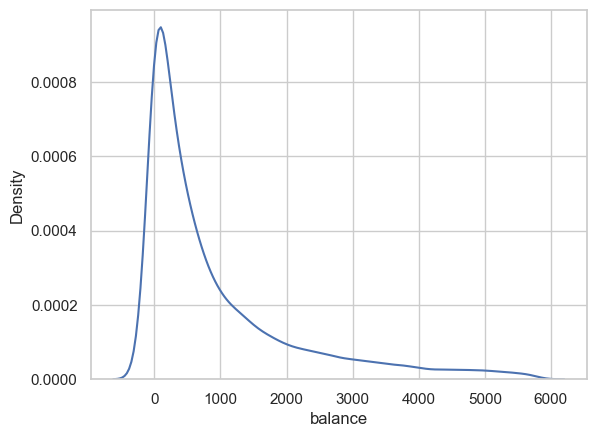

In [32]:
sns.kdeplot(train_df['balance'], palette='viridis')

/tmp/ipykernel_42/1190658190.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(train_df['balance'], palette='viridis')


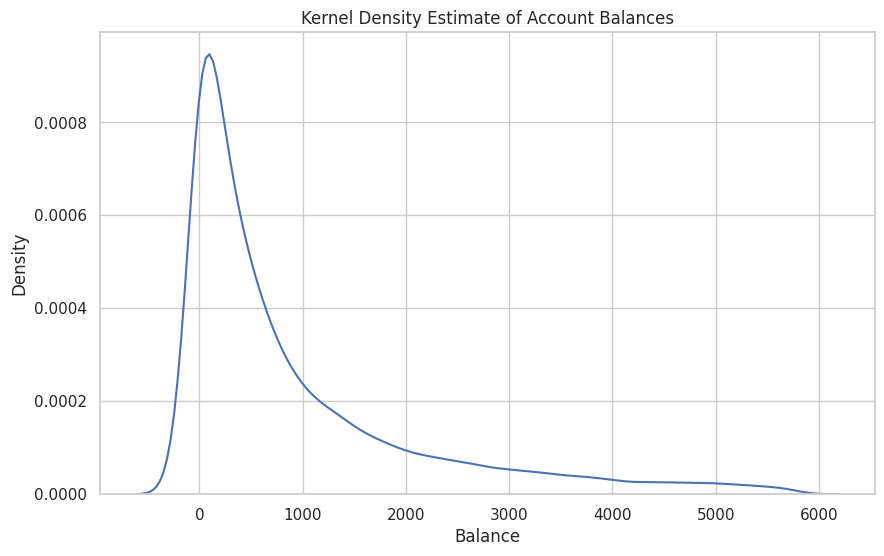

    What do you think about the graph now?

**Plot the [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) again using seaborn**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2411299523.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, y = 'balance', palette='viridis')


<Axes: ylabel='balance'>

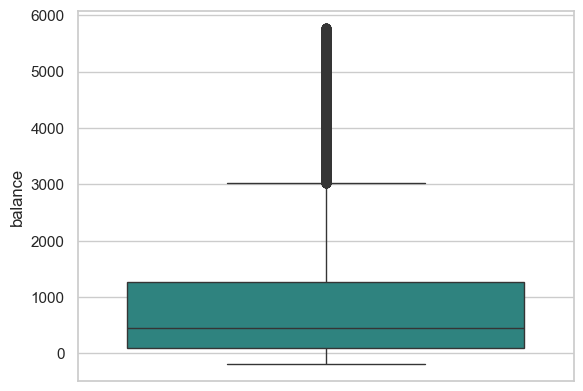

In [33]:
sns.boxplot(data=train_df, y = 'balance', palette='viridis')

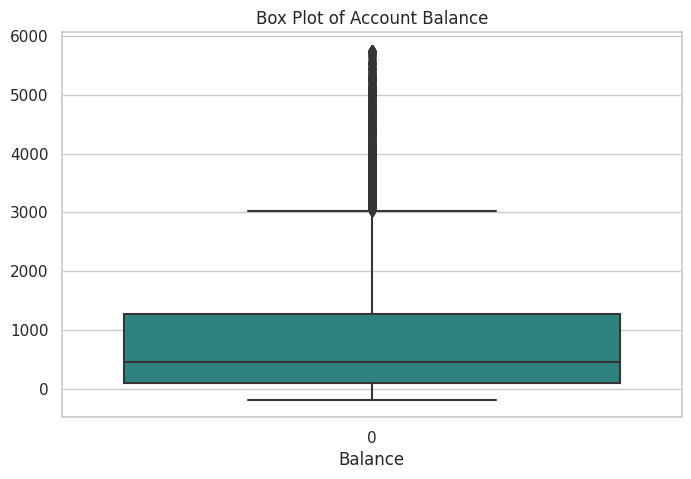

#### **Housing Loan Feature - Whether the customer has a housing loan or not.**

In [34]:
train_df.housing.value_counts()

housing
yes    22448
no     18352
Name: count, dtype: int64

housing
yes    22448
no     18352
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2039612997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'housing', palette= 'viridis', order=train_df.housing.value_counts().index)


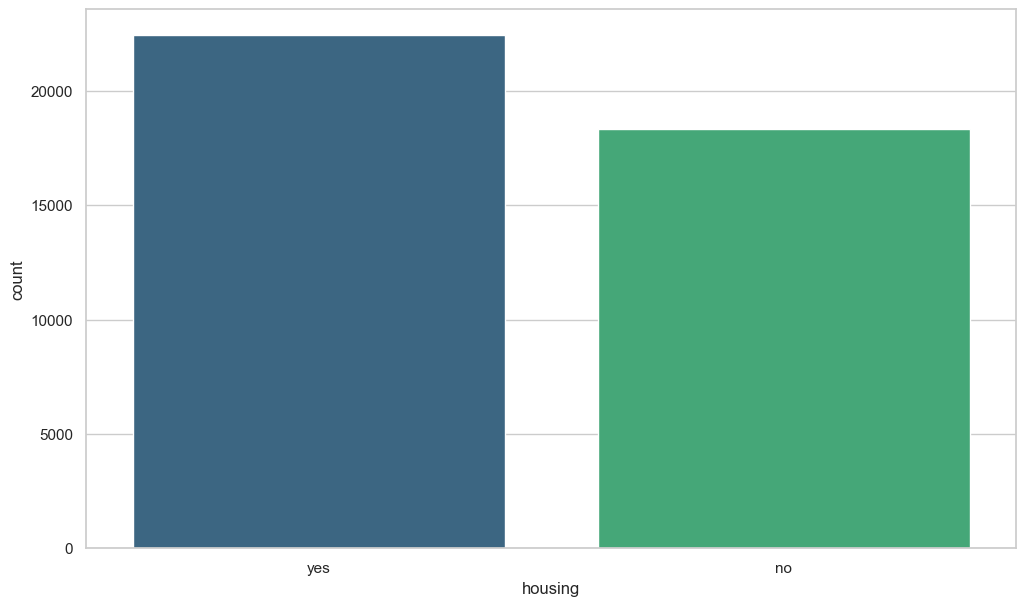

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'housing', palette= 'viridis', order=train_df.housing.value_counts().index)
plt.show()

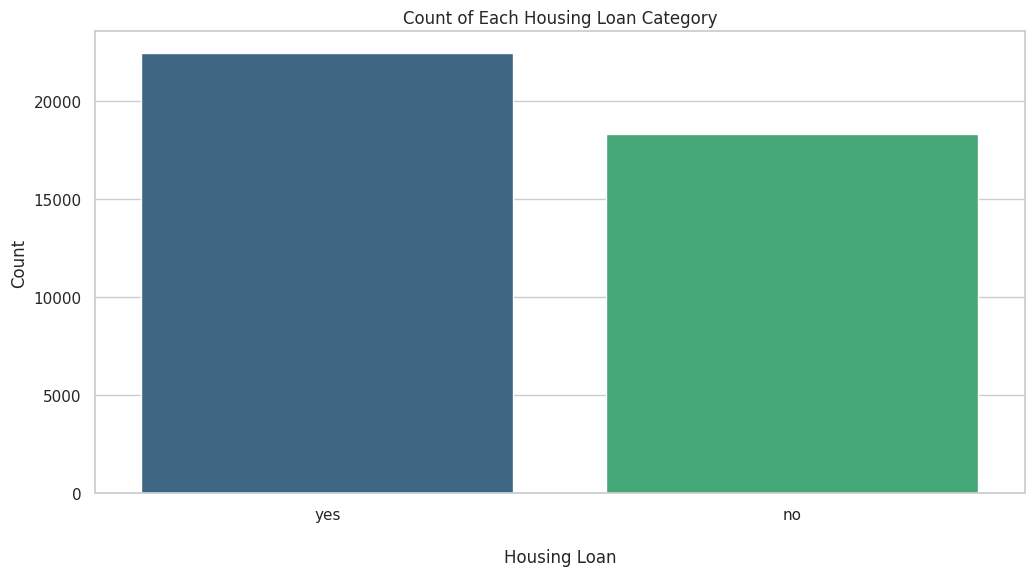

#### **Loan Feature - Whether the customer has a loan or not.**

In [36]:
train_df.loan.value_counts()

loan
no     34462
yes     6338
Name: count, dtype: int64

loan
no     34462
yes     6338
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1279211135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'loan', palette= 'viridis', order=train_df.loan.value_counts().index)


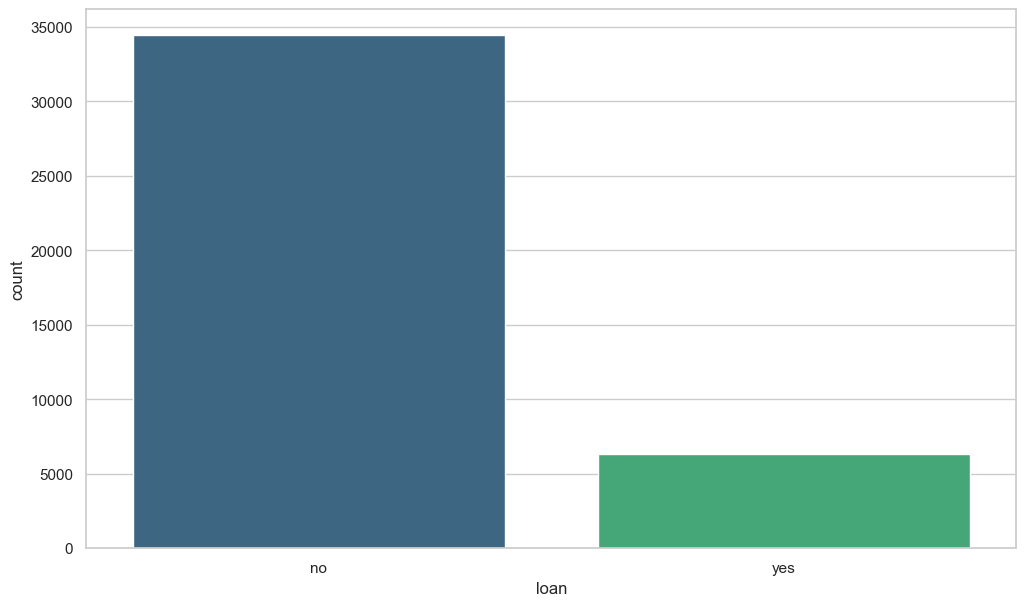

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'loan', palette= 'viridis', order=train_df.loan.value_counts().index)
plt.show()

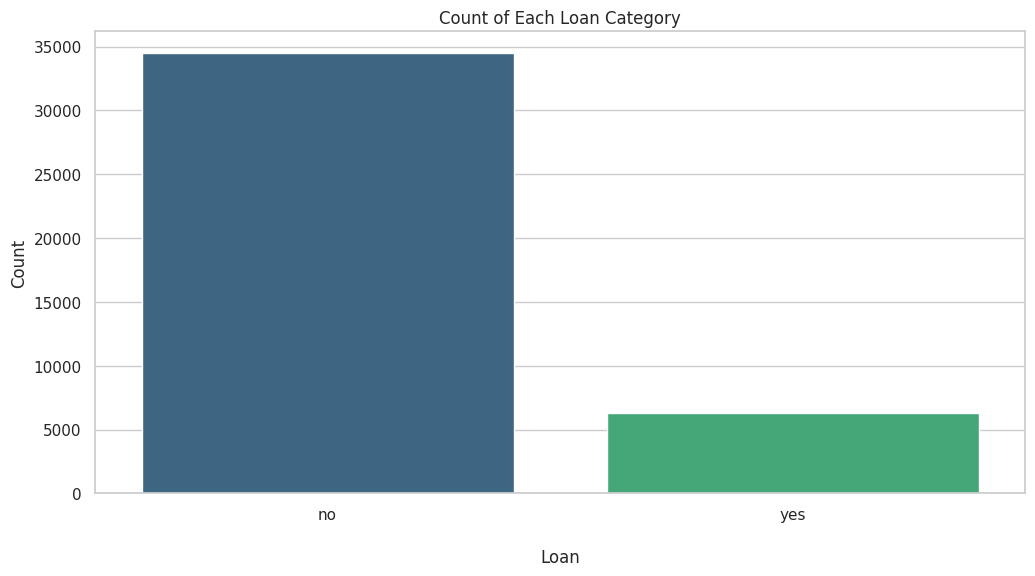

#### **Contact Feature - Type of communication used to contact customers**

In [38]:
train_df.contact.value_counts()

contact
cellular     26530
unknown      11625
telephone     2645
Name: count, dtype: int64

contact
cellular     26530
unknown      11625
telephone     2645
Name: count, dtype: int64

**Rename "unknown" values with "others".**

In [39]:
train_df.contact.replace('unknown', 'others', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1107644419.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.contact.replace('unknown', 'others', inplace=True)


In [40]:
train_df.contact.value_counts()

contact
cellular     26530
others       11625
telephone     2645
Name: count, dtype: int64

contact
cellular     26530
others       11625
telephone     2645
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1406187858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'contact', palette= 'viridis', order=train_df.contact.value_counts().index)


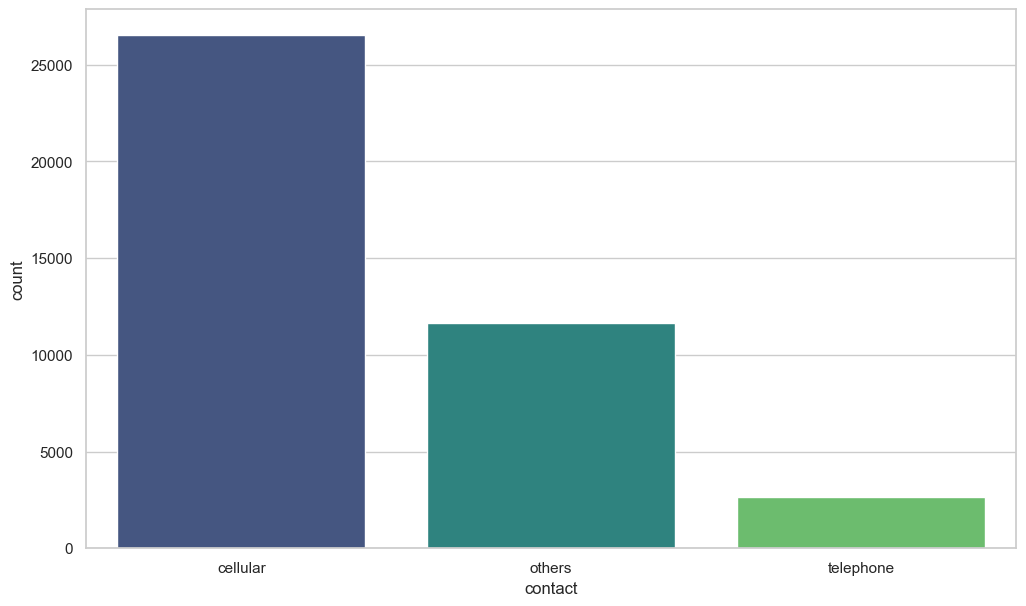

In [41]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'contact', palette= 'viridis', order=train_df.contact.value_counts().index)
plt.show()

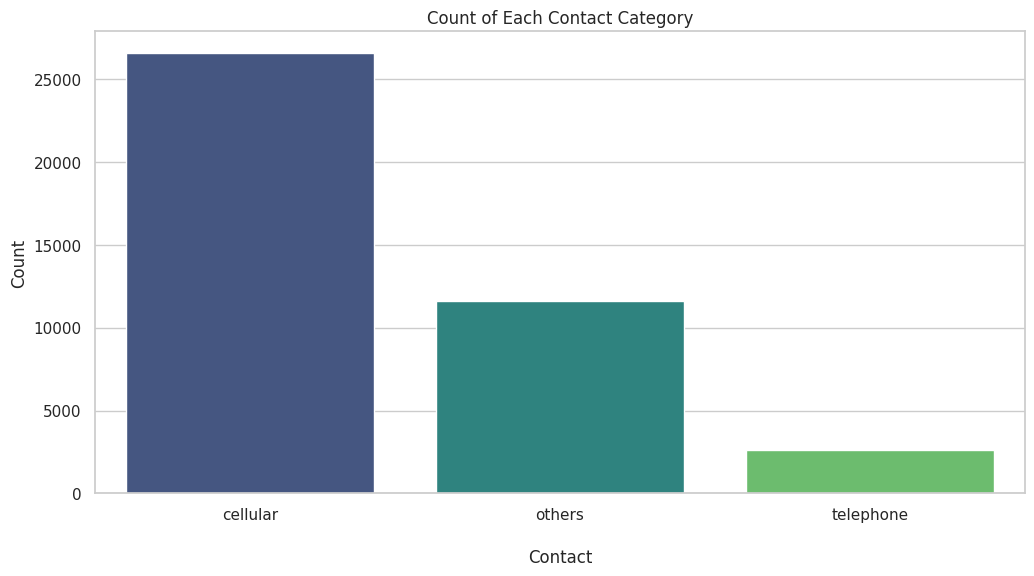

**Also, Don't forget to rename these values in test data.**

In [42]:
test_df.contact.replace('unknown', 'others', inplace=True)
test_df.contact.value_counts()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1090368307.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df.contact.replace('unknown', 'others', inplace=True)


contact
cellular     2896
others       1324
telephone     301
Name: count, dtype: int64

contact
cellular     2896
others       1324
telephone     301
Name: count, dtype: int64

#### **Day Feature - Day of the month when customers were last contacted.**

In [43]:
train_df.day.value_counts()

day
20    2425
18    2059
17    1789
5     1769
6     1768
21    1762
8     1702
14    1664
7     1654
28    1645
29    1597
19    1550
15    1533
12    1469
13    1445
9     1423
30    1422
11    1338
4     1322
16    1309
2     1173
27     960
3      959
26     892
22     832
23     816
25     768
31     573
10     474
24     417
1      291
Name: count, dtype: int64

day
20    2425
18    2059
17    1789
5     1769
6     1768
21    1762
8     1702
14    1664
7     1654
28    1645
29    1597
19    1550
15    1533
12    1469
13    1445
9     1423
30    1422
11    1338
4     1322
16    1309
2     1173
27     960
3      959
26     892
22     832
23     816
25     768
31     573
10     474
24     417
1      291
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\41955203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = train_df, x = 'day', palette= 'viridis')


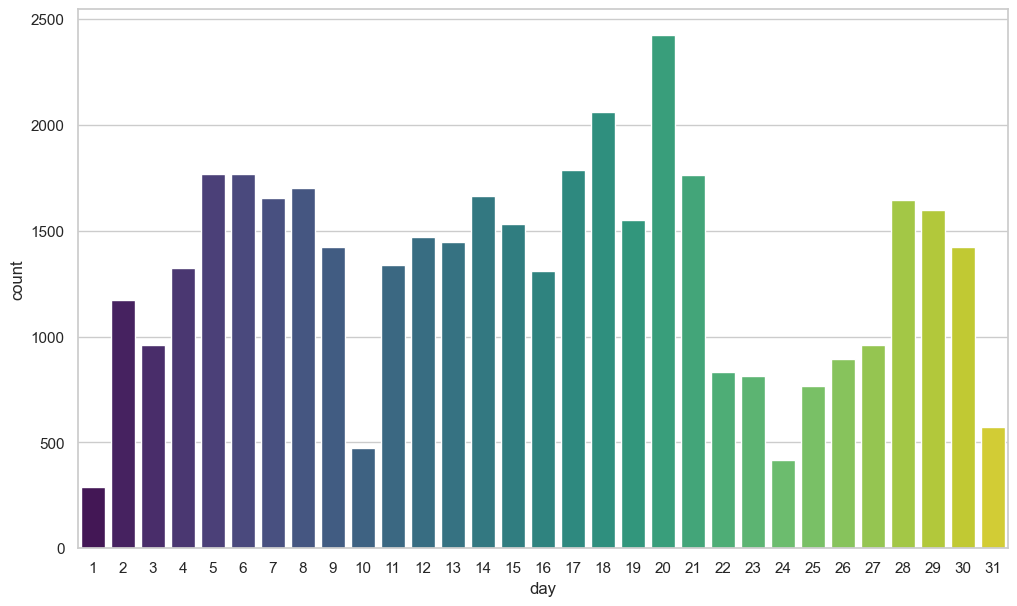

In [44]:
plt.figure(figsize=(12,7))
sns.countplot(data = train_df, x = 'day', palette= 'viridis')
plt.show()

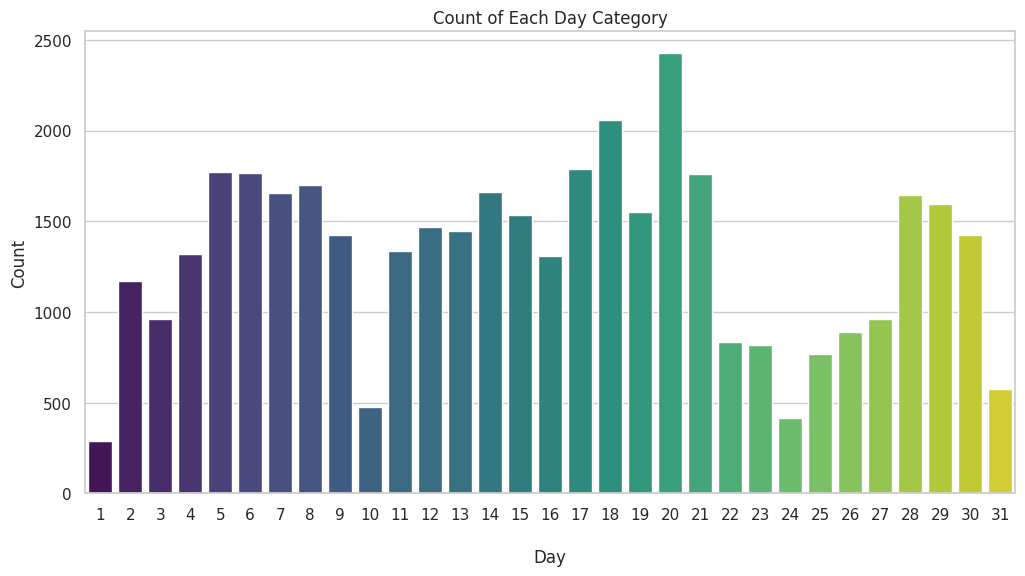

#### **Month Feature - last contact month of year.**

In [45]:
train_df.month.value_counts()

month
may    12310
jul     6233
aug     5763
jun     4793
nov     3387
apr     2711
feb     2454
jan     1322
oct      668
sep      533
mar      430
dec      196
Name: count, dtype: int64

month
may    12310
jul     6233
aug     5763
jun     4793
nov     3387
apr     2711
feb     2454
jan     1322
oct      668
sep      533
mar      430
dec      196
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3182258864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x = 'month', palette='viridis', order=train_df.month.value_counts().index)


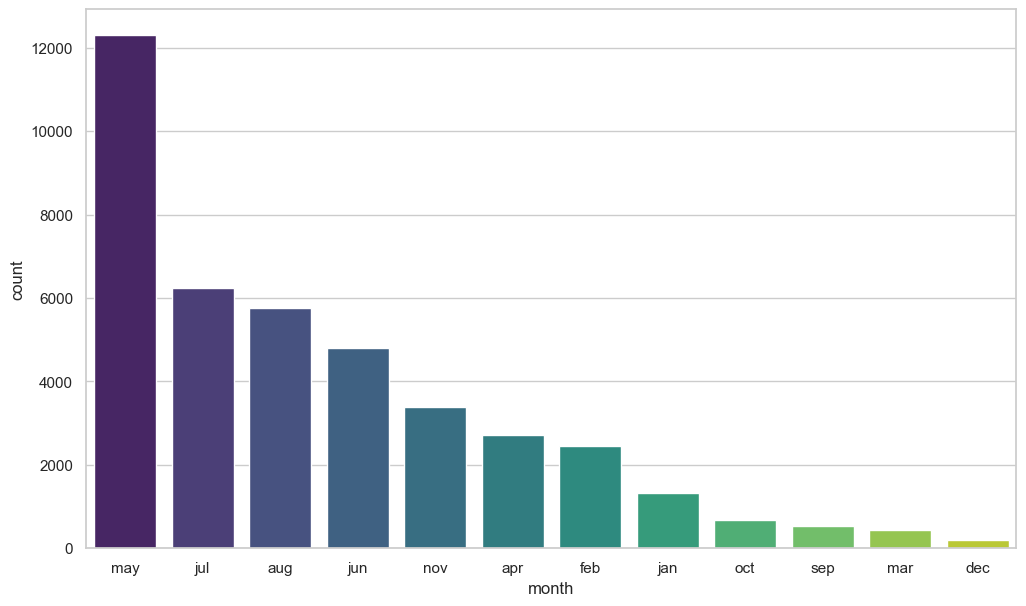

In [46]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df, x = 'month', palette='viridis', order=train_df.month.value_counts().index)
plt.show()

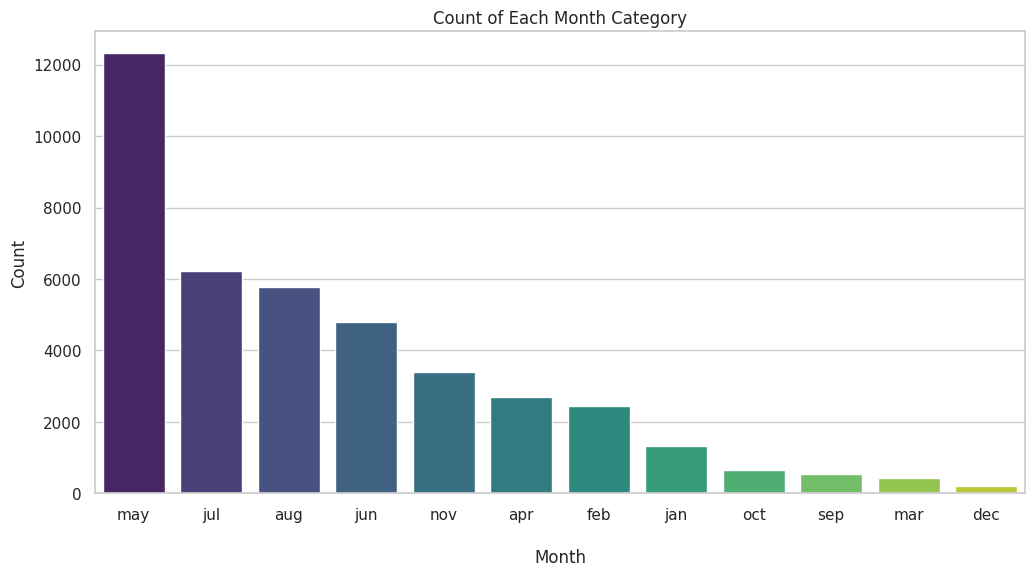

#### **Duration Feature - last contact duration, in seconds**

**Display statistical analysis for Duration column**

In [47]:
train_df.duration.describe()

count    40800.000000
mean       257.625931
std        257.278864
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       3881.000000
Name: duration, dtype: float64

count    40800.000000
mean       257.625931
std        257.278864
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       3881.000000
Name: duration, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\3321758609.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_df['duration'], bins=50, kde=True, palette='viridis')


<Axes: xlabel='duration', ylabel='Count'>

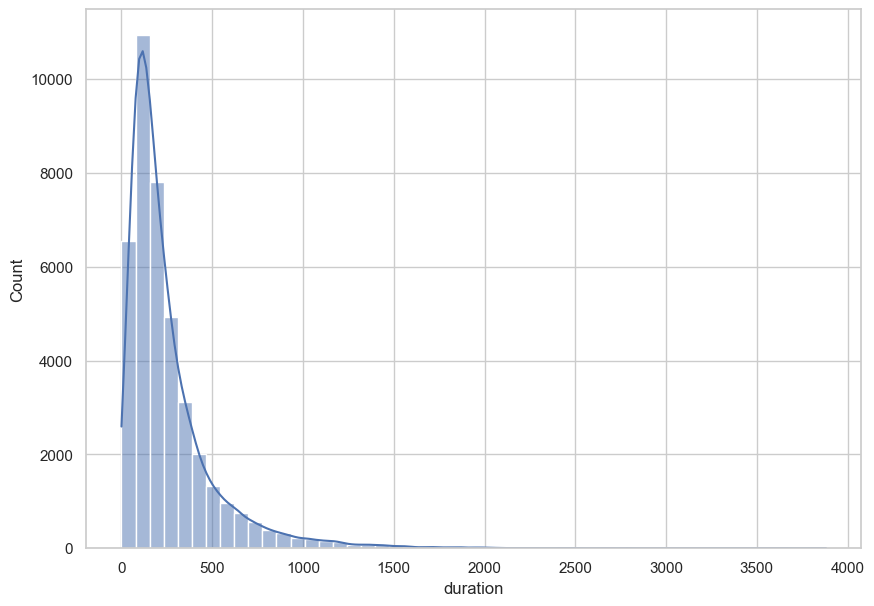

In [48]:
plt.figure(figsize=(10,7))
sns.histplot(train_df['duration'], bins=50, kde=True, palette='viridis')

/tmp/ipykernel_42/3320358875.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(train_df['duration'], bins=50, kde=True, palette='viridis')


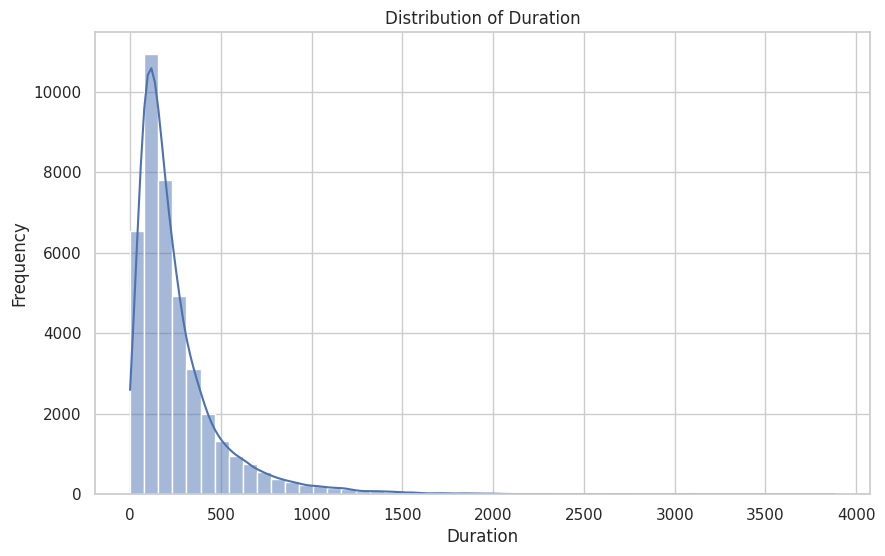

#### **Campaign Feature - number of contacts performed during this campaign and for this client**

In [49]:
train_df.campaign.describe()

count    40800.000000
mean         2.760490
std          3.079005
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

count    40800.000000
mean         2.760490
std          3.079005
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\2436671956.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_df.campaign, bins=30, kde=True, palette='viridis')


<Axes: xlabel='campaign', ylabel='Count'>

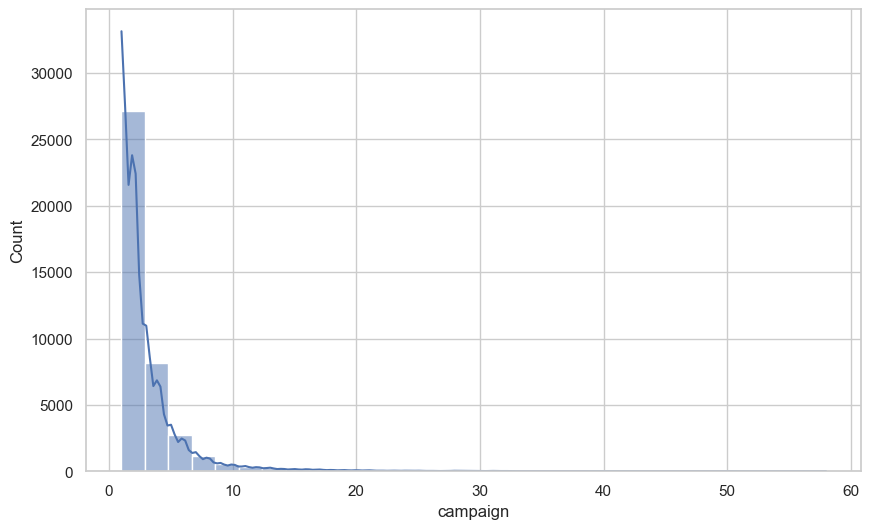

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(train_df.campaign, bins=30, kde=True, palette='viridis')

/tmp/ipykernel_42/225366631.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(train_df['campaign'], bins=30, kde=True, palette='viridis')


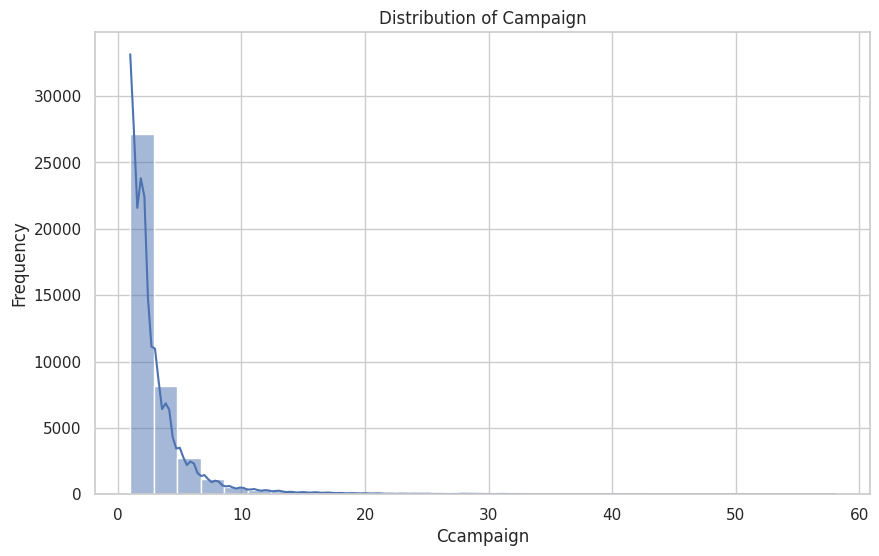

#### **Passed Days - number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted)**

In [52]:
# Get the values that doesn't -1 
filtered_data = train_df[train_df['pdays'] != -1]

In [53]:
filtered_data.pdays.describe()

count    7494.000000
mean      224.477315
std       115.930819
min         1.000000
25%       131.000000
50%       195.000000
75%       326.000000
max       871.000000
Name: pdays, dtype: float64

In [50]:
# Get statistical summary


count    7494.000000
mean      224.477315
std       115.930819
min         1.000000
25%       131.000000
50%       195.000000
75%       326.000000
max       871.000000
Name: pdays, dtype: float64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1304052573.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = filtered_data.pdays, bins=30, kde = True, palette='viridis');


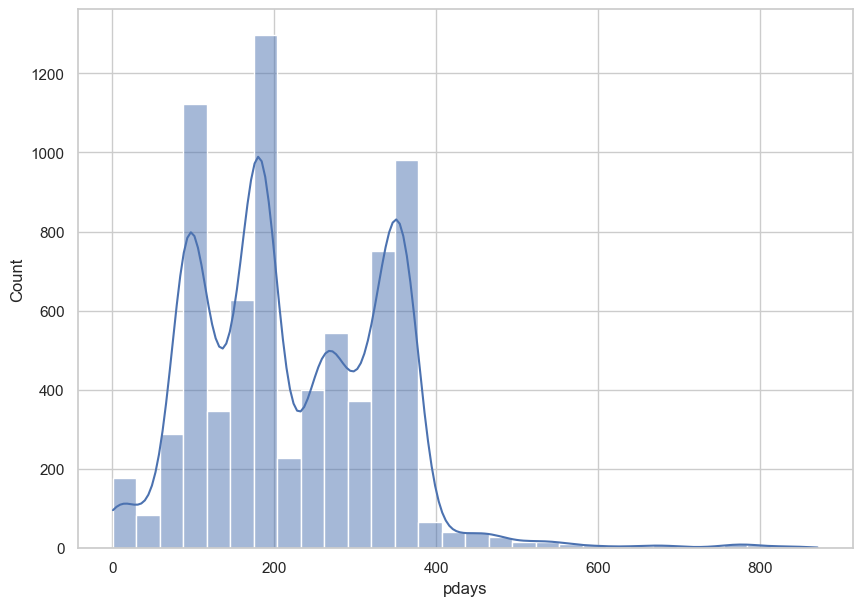

In [54]:
plt.figure(figsize=(10,7))
sns.histplot(data = filtered_data.pdays, bins=30, kde = True, palette='viridis');

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8280\4189965813.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = filtered_data.pdays, bins=30, kde = True, palette='viridis');


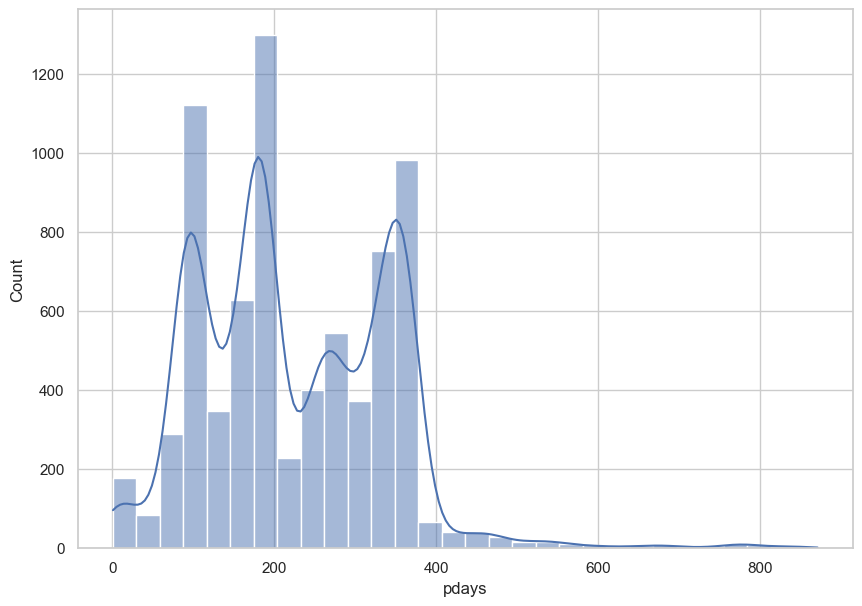

#### **Previous Contacts - number of contacts performed before this campaign and for this client.**

In [55]:
train_df.previous.value_counts()

previous
0      33306
1       2522
2       1896
3       1035
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

previous
0      33306
1       2522
2       1896
3       1035
4        651
5        418
6        255
7        187
8        126
9         79
10        62
11        61
12        41
13        31
14        18
15        18
17        13
16        12
19        10
20         7
23         7
22         6
24         5
27         5
18         4
21         4
29         3
25         3
38         2
37         2
30         2
51         1
275        1
26         1
58         1
28         1
32         1
40         1
55         1
41         1
Name: count, dtype: int64

**This feature is useless, the most of values have 0 value, so drop it**

In [56]:
train_df.drop('previous',axis = 1, inplace=True)

**Also, don't forget drop this column from test data.**

In [57]:
test_df.drop('previous',axis = 1, inplace=True)

#### **Previous Outcome - outcome of the previous marketing campaign**

In [58]:
train_df.poutcome.value_counts()

poutcome
unknown    33311
failure     4405
other       1678
success     1406
Name: count, dtype: int64

poutcome
unknown    33311
failure     4405
other       1678
success     1406
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\1109129848.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x = 'poutcome', palette='viridis', order=train_df.poutcome.value_counts().index)


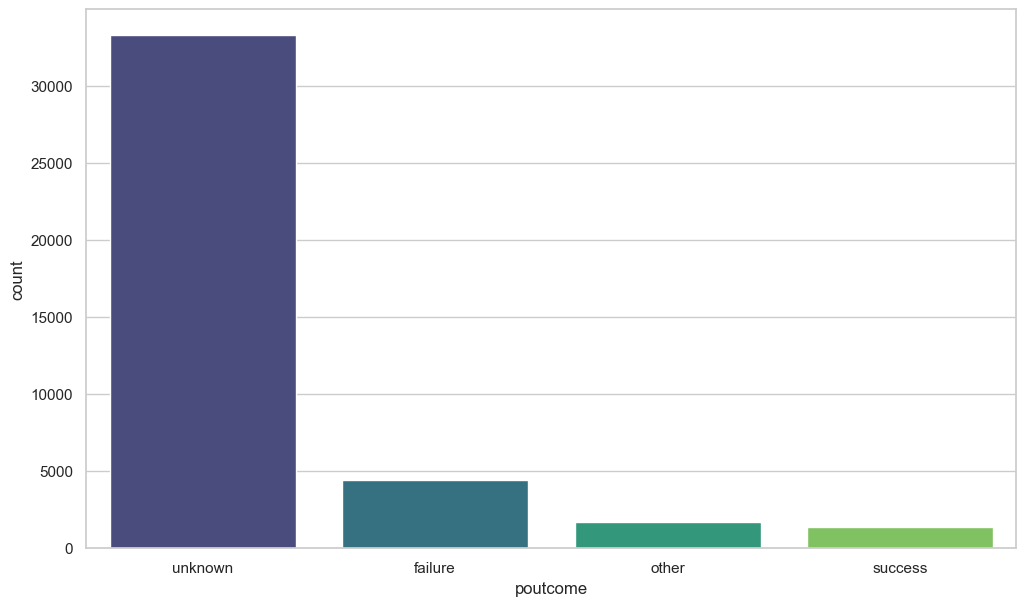

In [59]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df, x = 'poutcome', palette='viridis', order=train_df.poutcome.value_counts().index)
plt.show()

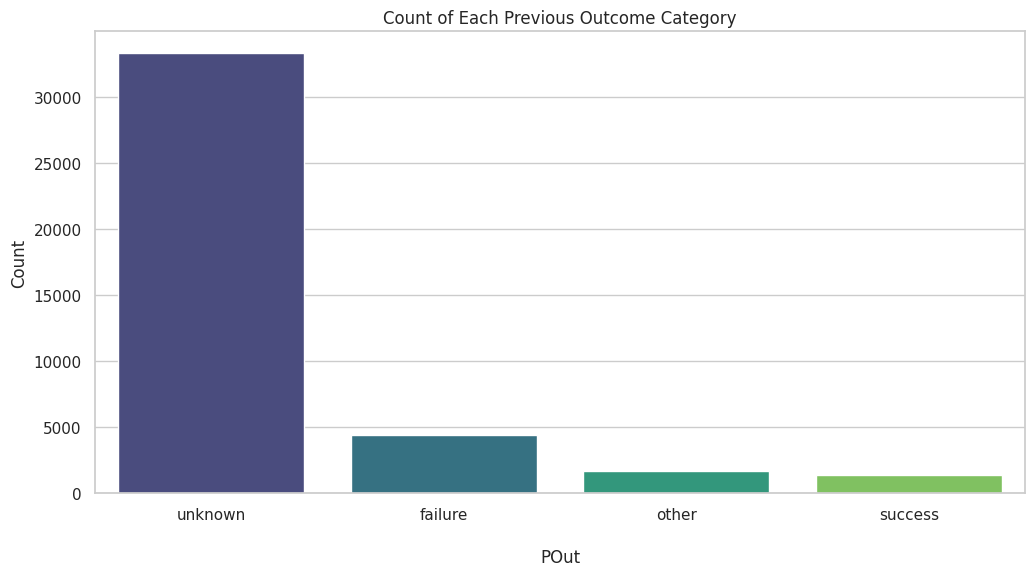

**This feature is useless, the most of values are unknowns, so drop it**

In [60]:
train_df.drop(columns=['poutcome'], inplace = True)

**Also, don't forget drop this column from test data.**

In [61]:
test_df.drop(columns=['poutcome'], inplace = True)

#### **Target Column - has the client subscribed a term deposit.**

In [62]:
train_df.y.value_counts()

y
no     35971
yes     4829
Name: count, dtype: int64

y
no     35971
yes     4829
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25108\4187871103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x = 'y', palette='viridis', order=train_df.y.value_counts().index)


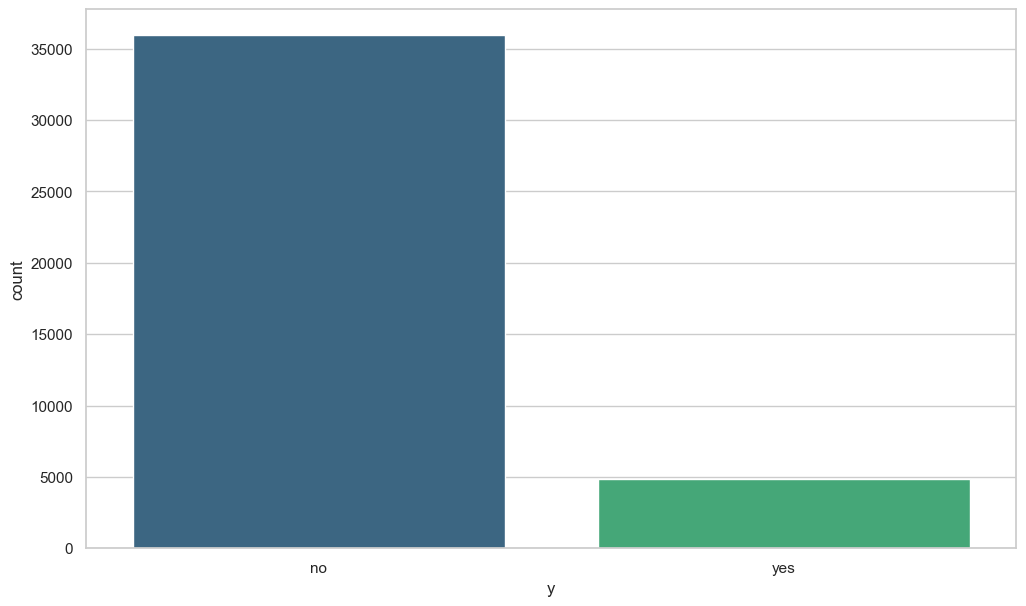

In [63]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_df, x = 'y', palette='viridis', order=train_df.y.value_counts().index)
plt.show()

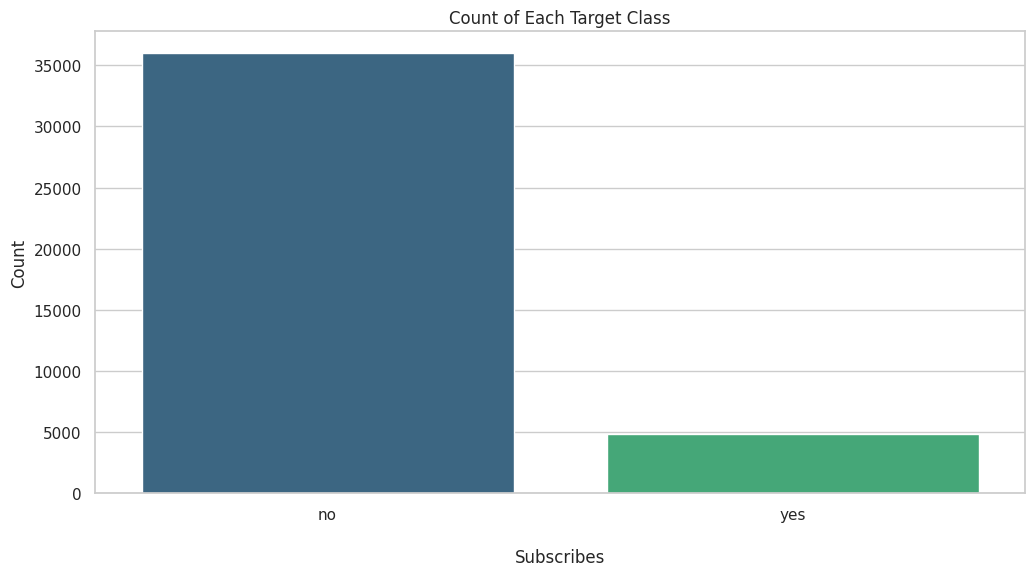

#### **Create a Label Encoder model to convert the categorical values into numeric**

In [64]:
train_df = train_df.apply(LabelEncoder().fit_transform)

In [65]:
train_df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0


In [62]:
# Display new_data head values


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,40,4,1,3,2310,1,0,1,4,8,261,0,0,0
1,26,10,2,2,219,1,0,1,4,8,151,0,0,0
2,15,2,1,2,192,1,1,1,4,8,76,0,0,0
3,29,1,1,0,1694,1,0,1,4,8,92,0,0,0
4,15,5,2,0,191,0,0,1,4,8,198,0,0,0


**Also, don't forget encode test data**

In [66]:
test_df = test_df.apply(LabelEncoder().fit_transform)

In [67]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,8,1,2,119,1,0,0,29,5,325,4,0,0
4517,38,7,1,3,0,1,1,1,8,8,149,0,0,0
4518,38,10,1,2,558,0,0,0,18,1,147,10,0,0
4519,9,1,1,2,1187,0,0,0,5,3,125,3,140,0


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,y
0,11,11,1,1,1475,0,0,0,18,10,75,0,0,0
1,14,8,1,2,2030,1,1,0,10,8,216,0,228,0
2,16,4,2,3,1303,1,0,0,15,0,181,0,219,0
3,11,4,1,3,1352,1,1,1,2,6,195,3,0,0
4,40,1,1,2,274,1,0,1,4,8,222,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,8,1,2,119,1,0,0,29,5,325,4,0,0
4517,38,7,1,3,0,1,1,1,8,8,149,0,0,0
4518,38,10,1,2,558,0,0,0,18,1,147,10,0,0
4519,9,1,1,2,1187,0,0,0,5,3,125,3,140,0


#### **Get Features Correlation**

<Axes: >

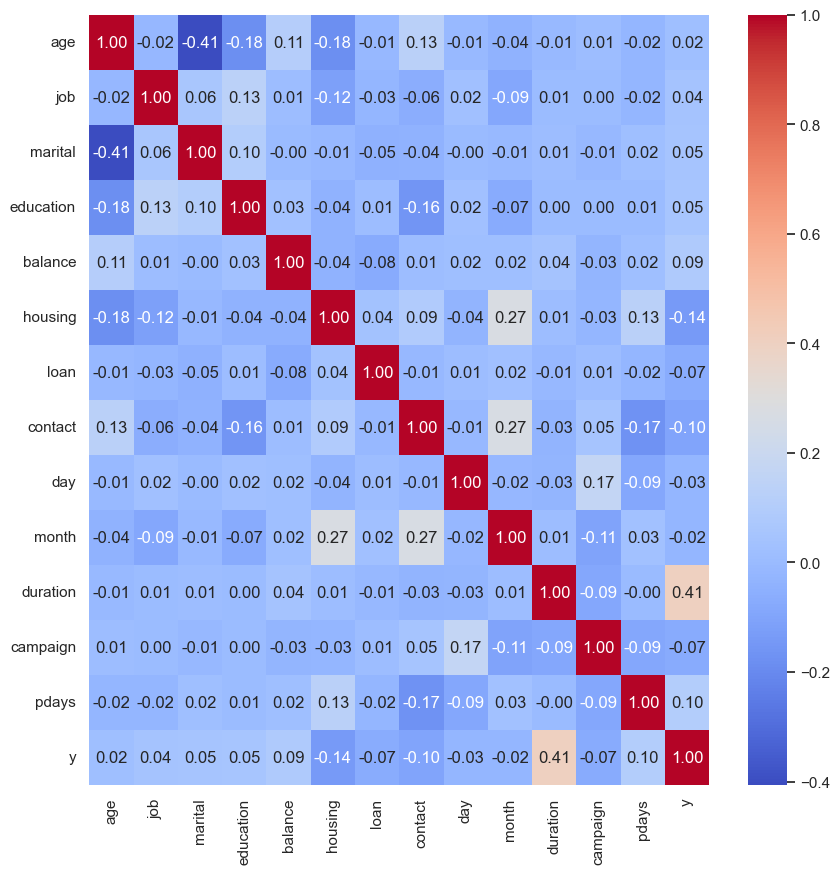

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', cmap = 'coolwarm')

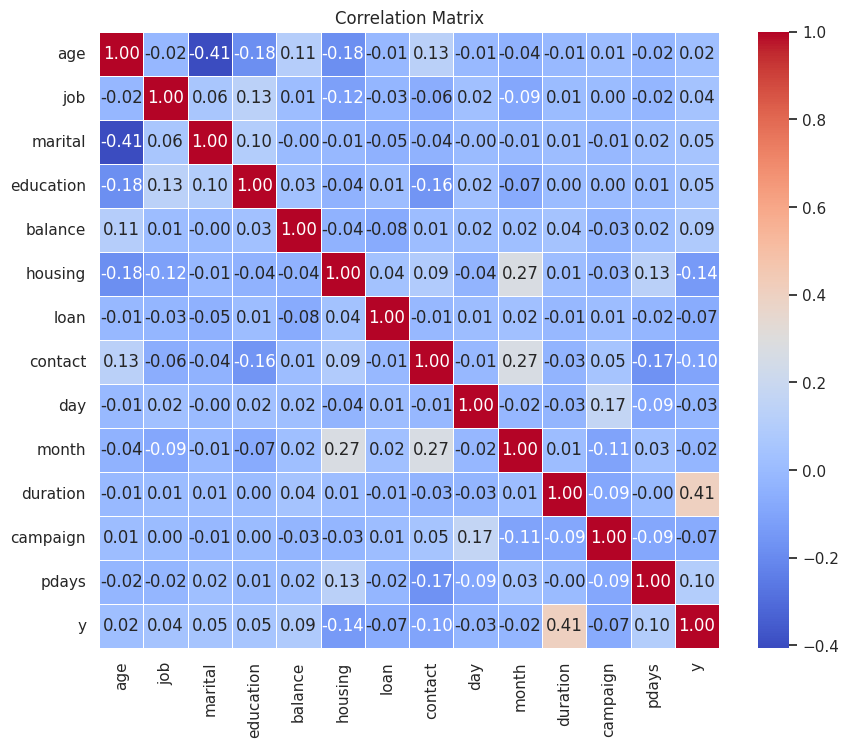

## **Data Preprocessing for ML Models**

#### **Define Features X and Target y**

- **For train data**

In [69]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

- **For test data**

In [70]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

## **Machine Learning Algorithms**

#### **Logistic Regression**
[Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [71]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Display training score**

In [74]:
print(lr.score(X_train, y_train))

0.88875


0.8885539215686274


**Display testing score**

In [73]:
print(lr.score(X_test, y_test))

0.8836540588365406


0.8854235788542358


**Get prediction**

In [75]:
y_pred = lr.predict(X_test)

**Plot Confusion Matrix**

<Axes: >

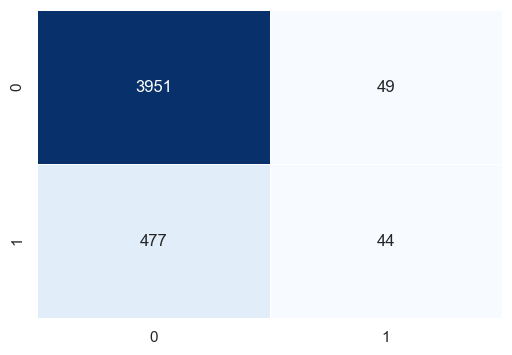

In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

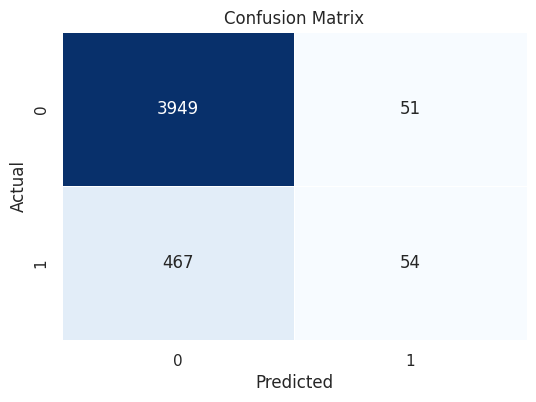

**Print Classification Report**

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.47      0.08      0.14       521

    accuracy                           0.88      4521
   macro avg       0.68      0.54      0.54      4521
weighted avg       0.84      0.88      0.85      4521



              precision    recall  f1-score   support

           0       0.89      0.99      0.94      4000
           1       0.51      0.10      0.17       521

    accuracy                           0.89      4521
   macro avg       0.70      0.55      0.56      4521
weighted avg       0.85      0.89      0.85      4521



## SVC

In [78]:
svc = SVC(C=5, gamma='auto')
svc.fit(X_train, y_train)

SVC(C=5, gamma='auto')

In [79]:
print(svc.score(X_train, y_train))

1.0


In [80]:
print(svc.score(X_test, y_test))

0.8847600088476001


In [81]:
y_pred = svc.predict(X_test)

<Axes: >

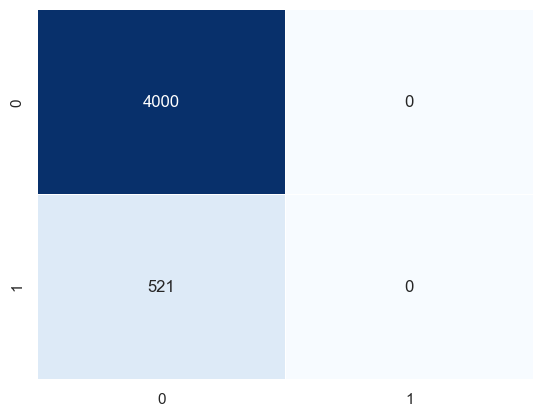

In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## KNN

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
print(knn.score(X_train, y_train))

0.9104166666666667


In [88]:
print(knn.score(X_test, y_test))

0.8745852687458527


In [89]:
y_pred = knn.predict(X_test)

<Axes: >

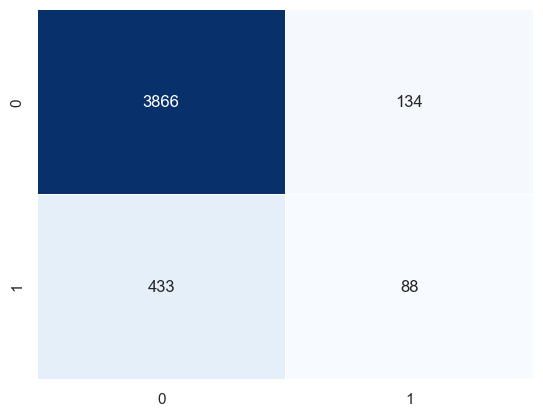

In [90]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4000
           1       0.40      0.17      0.24       521

    accuracy                           0.87      4521
   macro avg       0.65      0.57      0.58      4521
weighted avg       0.84      0.87      0.85      4521



$$\mathrm{Share \space your \space notebook \space on \space KAGGLE}$$
$$\mathrm{Best \space Wishes..♡}$$
